In [1]:
import sys
import os
import pandas as pd
import numpy as np

sys.path.append(os.path.abspath("../src"))
sys.path.append(os.path.abspath("../analysis"))

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy, DatasetShapeInspectionStrategy, UniqueTypeInspectionStrategy
from analyze_src.missing_values_analysis import MissingValuesAnalyser, MissingValuesHeatMapStrategy
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis, CategoricalVsCategoricalAnalysis, CategoricalVsCategoricalBarAnalysis
from analyze_src.multivariate_analysis import MultivariateAnalyser, CorrelationHeatmapAnalysis, PairPlotAnalysis
from feature_engineering import (
    FeatureEngineer,
    LogTransformation,
    MinMaxScaling,
    OneHotEncoding,
    StandardScaling,
    BooleanToBinaryEncoding,
    CategoricalToIntegerEncoding
)
from outlier_detection import OutlierDetector, ZScoreOutlierDetection, IQROutlierDetection

In [2]:
data_path = 'c:/Users/Lenovo/Desktop/online-shopping-analysis/data/data.csv'
df = pd.read_csv(data_path)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [4]:
feature_engineering = FeatureEngineer(BooleanToBinaryEncoding(features=["Weekend", "Revenue"]))
test01 = feature_engineering.apply_feature_engineering(df)
test01.head()

2025-09-05 13:17:16,297 - INFO - Applying feature engineering strategy.
2025-09-05 13:17:16,298 - INFO - Converting boolean features ['Weekend', 'Revenue'] to binary (0/1).
2025-09-05 13:17:16,301 - INFO - Boolean to binary conversion completed.


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


2025-09-05 13:22:35,598 - INFO - Switching feature engineering strategy.
2025-09-05 13:22:35,601 - INFO - Applying feature engineering strategy.
2025-09-05 13:22:35,602 - INFO - Applying log transformation to features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues']
2025-09-05 13:22:35,610 - INFO - Log transformation completed.
2025-09-05 13:22:35,611 - INFO - Switching feature engineering strategy.
2025-09-05 13:22:35,612 - INFO - Applying feature engineering strategy.
2025-09-05 13:22:35,614 - INFO - Converting categorical features ['Month'] to integer codes.
2025-09-05 13:22:35,619 - INFO - Categorical to integer conversion completed.


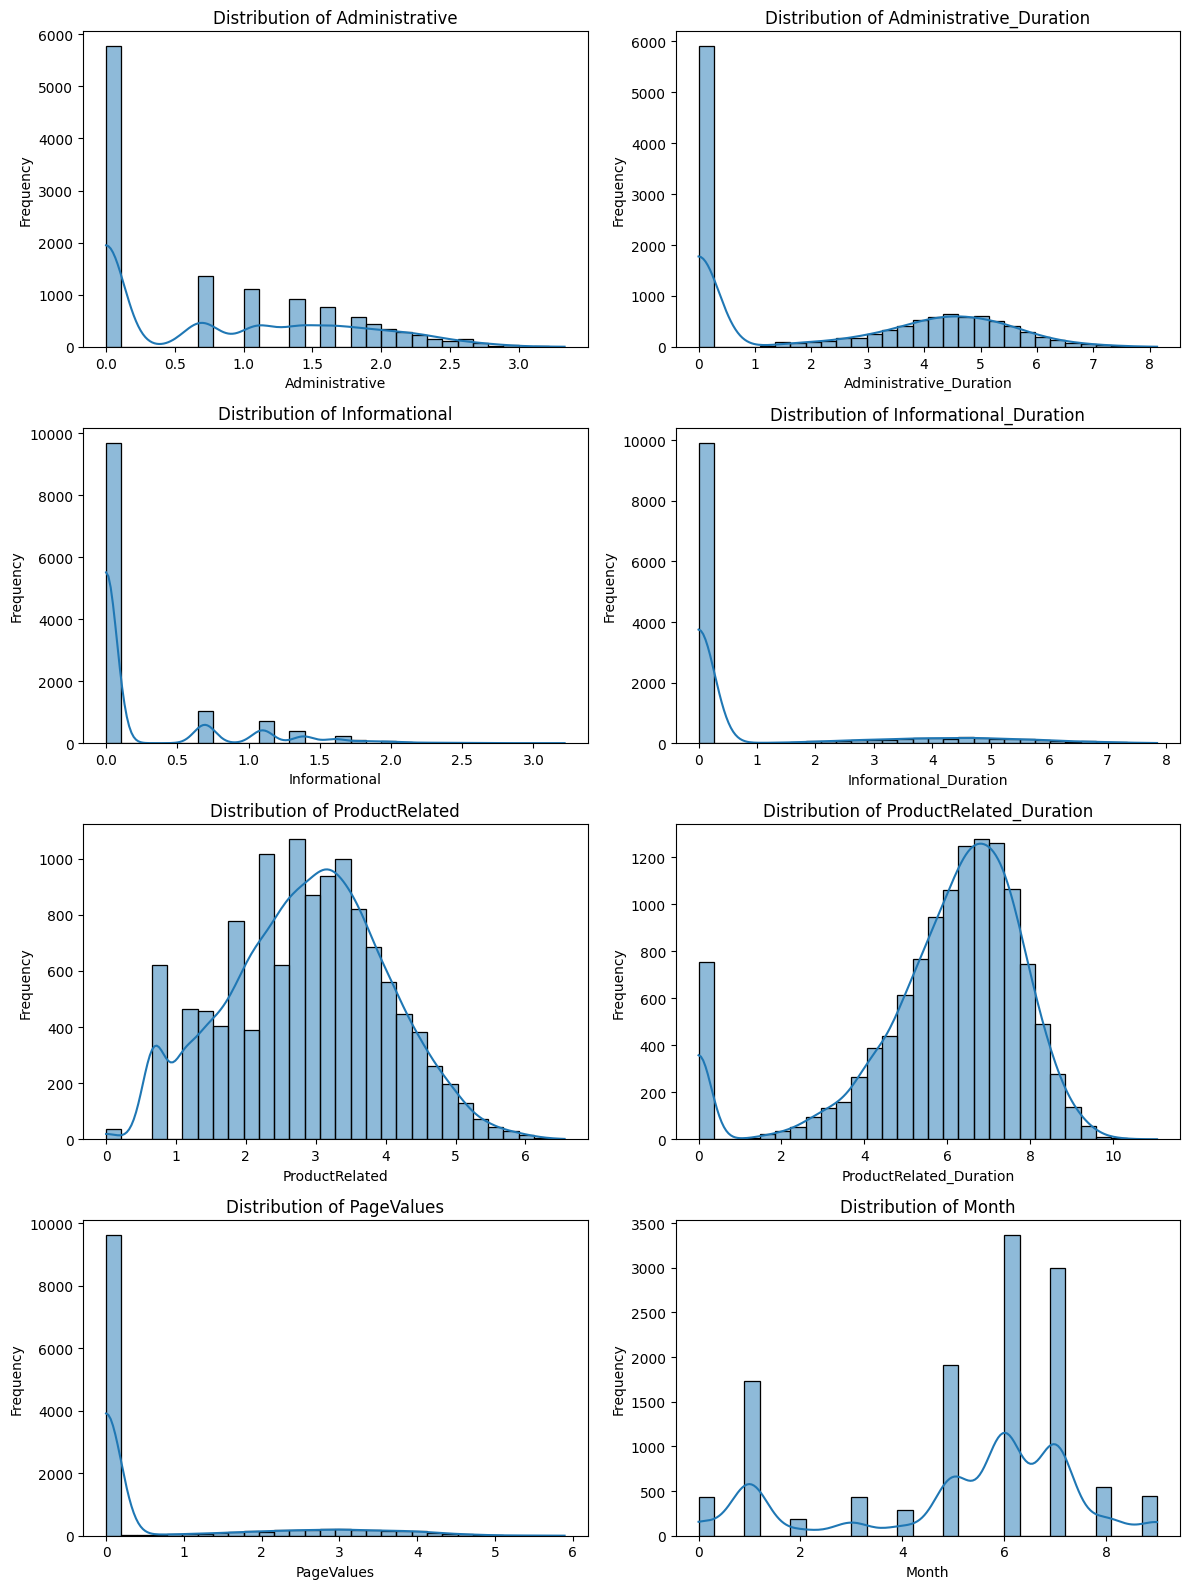

In [10]:
feature_engineering.set_strategy(LogTransformation(
    features=["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "PageValues"]))
test02 = feature_engineering.apply_feature_engineering(test01)
feature_engineering.set_strategy(CategoricalToIntegerEncoding(
    features=["Month"]
))
test03 = feature_engineering.apply_feature_engineering(test02)

univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(test03, feature = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "PageValues", "Month"])

2025-09-05 13:22:48,671 - INFO - Visualizing outliers for features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues', 'BounceRates', 'ExitRates']


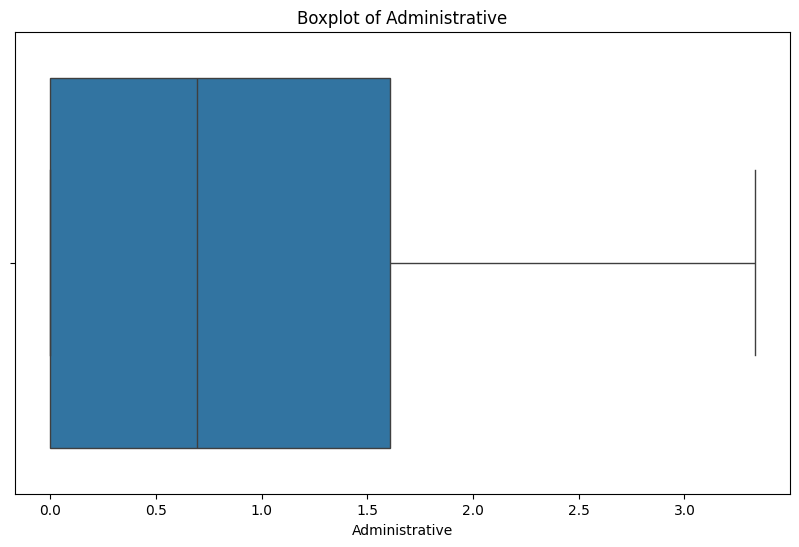

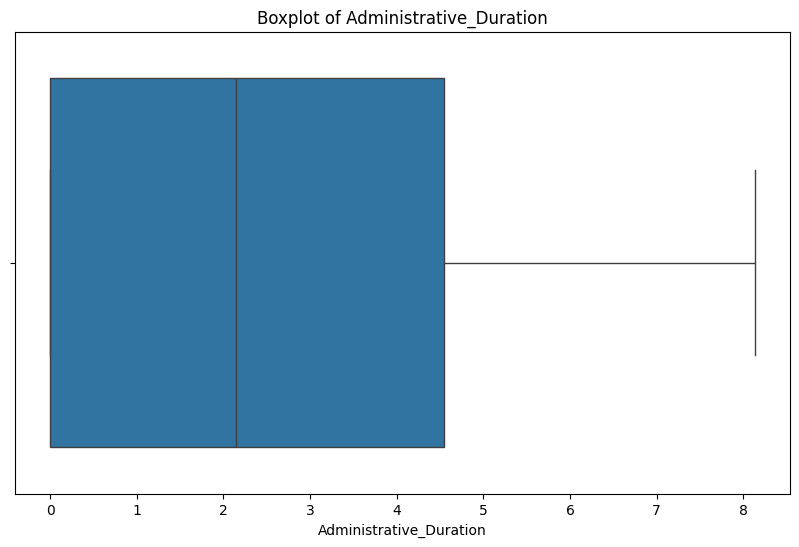

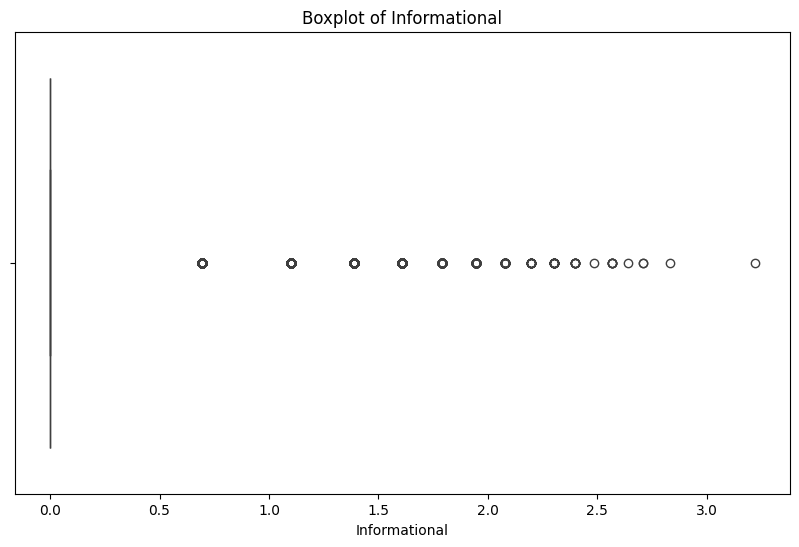

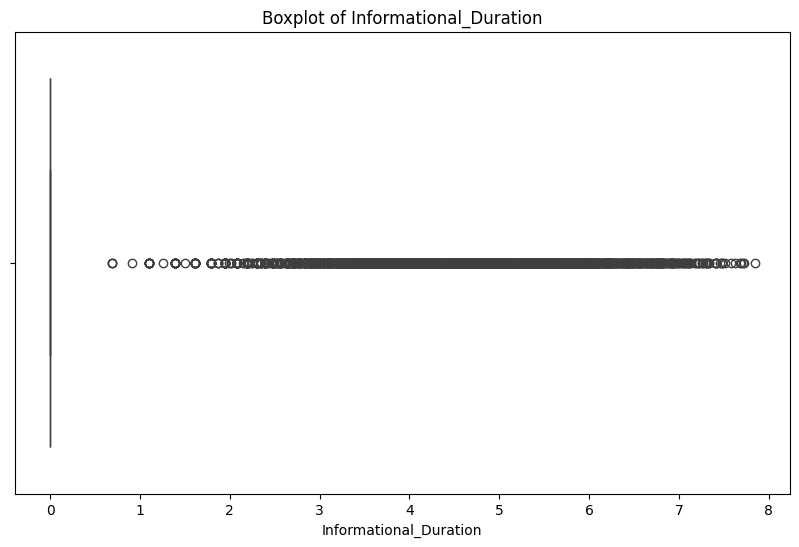

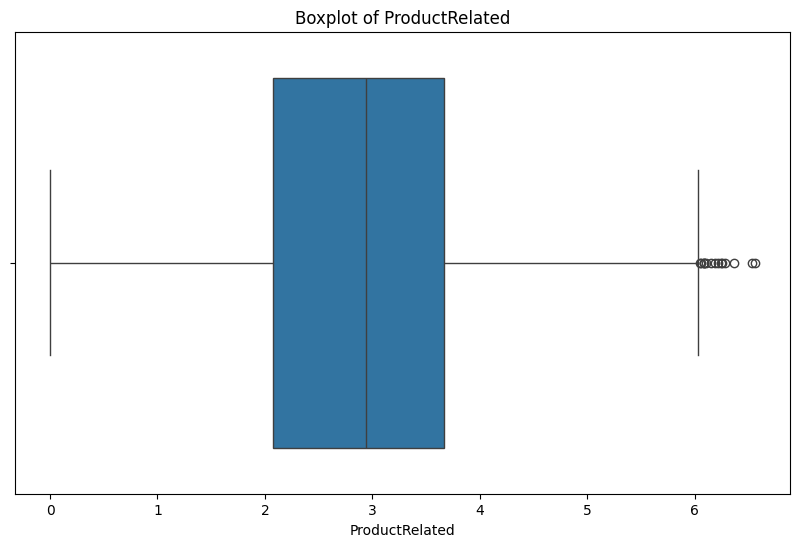

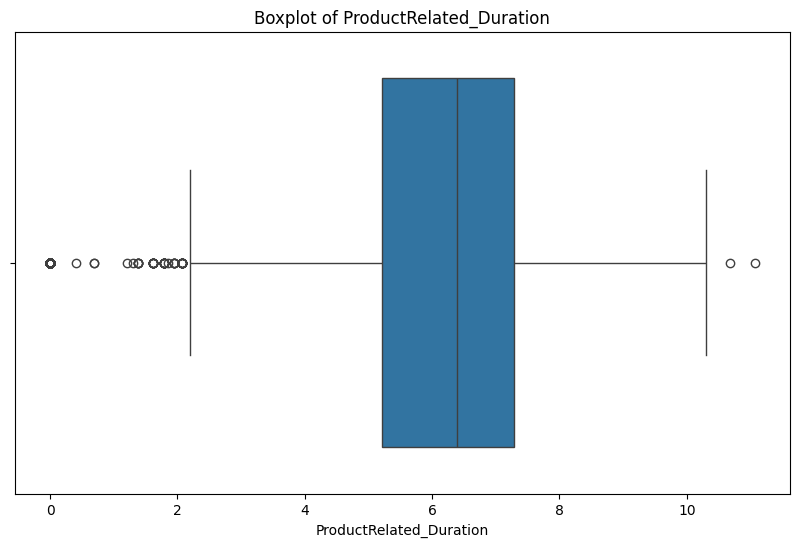

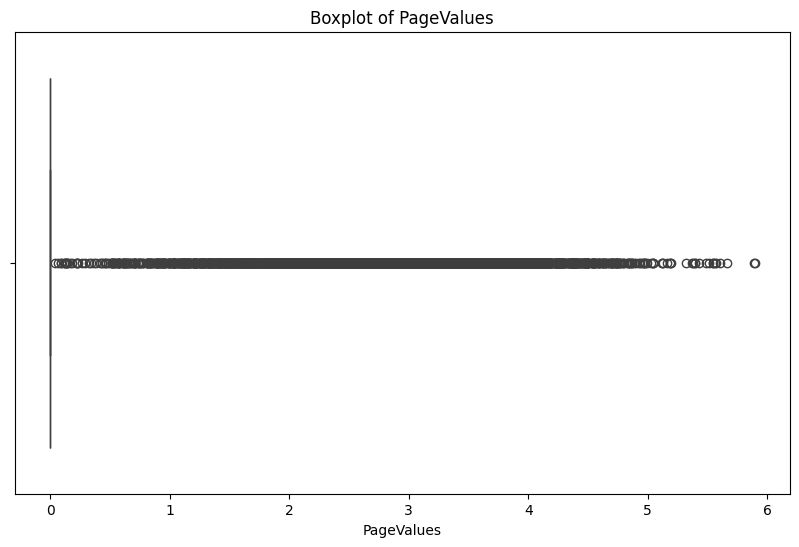

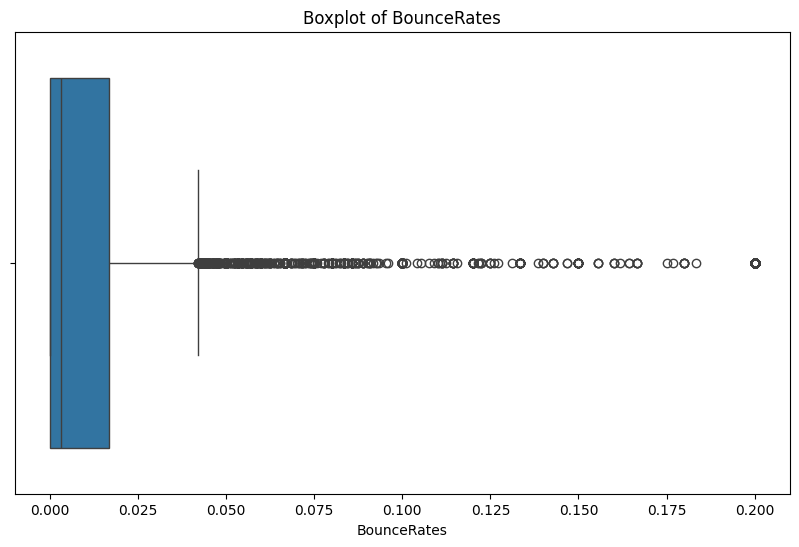

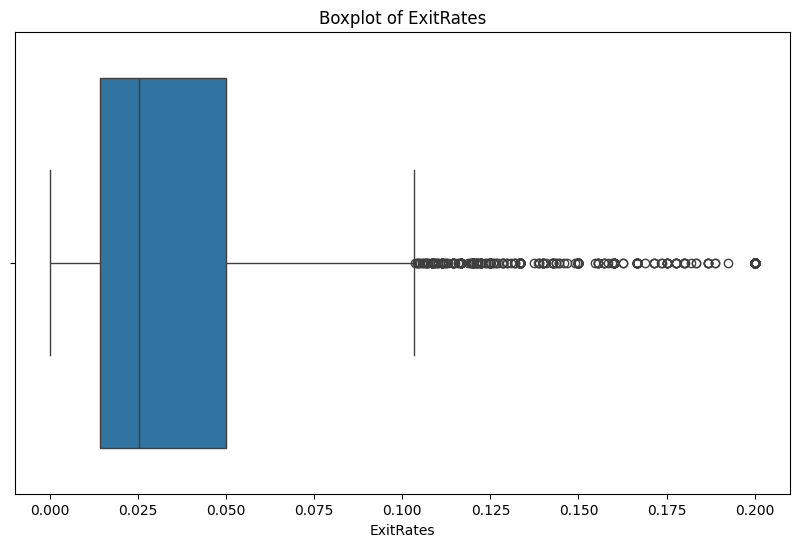

2025-09-05 13:22:50,460 - INFO - Outlier visualization completed.


In [11]:
outlier_detector = OutlierDetector(ZScoreOutlierDetection())
outlier_detector.visualize_outliers(test03, features = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "PageValues", "BounceRates", "ExitRates"])

In [12]:
outlier_detector.detect_outliers(test02, features = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "PageValues", "BounceRates", "ExitRates"])

2025-09-05 13:22:51,051 - INFO - Executing outlier detection strategy.
2025-09-05 13:22:51,053 - INFO - Detecting outliers using the Z-score method.
2025-09-05 13:22:51,071 - INFO - Feature 'Administrative': 0 outliers detected.
2025-09-05 13:22:51,072 - INFO - Feature 'Administrative_Duration': 0 outliers detected.
2025-09-05 13:22:51,073 - INFO - Feature 'Informational': 83 outliers detected.
2025-09-05 13:22:51,074 - INFO - Feature 'Informational_Duration': 31 outliers detected.
2025-09-05 13:22:51,075 - INFO - Feature 'ProductRelated': 0 outliers detected.
2025-09-05 13:22:51,077 - INFO - Feature 'ProductRelated_Duration': 0 outliers detected.
2025-09-05 13:22:51,078 - INFO - Feature 'PageValues': 23 outliers detected.
2025-09-05 13:22:51,079 - INFO - Feature 'BounceRates': 700 outliers detected.
2025-09-05 13:22:51,080 - INFO - Feature 'ExitRates': 0 outliers detected.
2025-09-05 13:22:51,081 - INFO - Outliers detected with Z-score threshold: 3.5.


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,BounceRates,ExitRates
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12325,False,False,False,False,False,False,False,False,False
12326,False,False,False,False,False,False,False,False,False
12327,False,False,False,False,False,False,False,False,False
12328,False,False,False,False,False,False,False,False,False


In [13]:
outlier_detector.set_strategy(IQROutlierDetection())
outlier_detector.detect_outliers(test02, features = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "PageValues", "BounceRates", "ExitRates"])

2025-09-05 13:22:52,702 - INFO - Switching outlier detection strategy.
2025-09-05 13:22:52,703 - INFO - Executing outlier detection strategy.
2025-09-05 13:22:52,704 - INFO - Detecting outliers using the IQR method.
2025-09-05 13:22:52,728 - INFO - Feature 'Administrative': 0 outliers detected.
2025-09-05 13:22:52,730 - INFO - Feature 'Administrative_Duration': 0 outliers detected.
2025-09-05 13:22:52,731 - INFO - Feature 'Informational': 2631 outliers detected.
2025-09-05 13:22:52,732 - INFO - Feature 'Informational_Duration': 2405 outliers detected.
2025-09-05 13:22:52,734 - INFO - Feature 'ProductRelated': 15 outliers detected.
2025-09-05 13:22:52,736 - INFO - Feature 'ProductRelated_Duration': 810 outliers detected.
2025-09-05 13:22:52,737 - INFO - Feature 'PageValues': 2730 outliers detected.
2025-09-05 13:22:52,738 - INFO - Feature 'BounceRates': 1551 outliers detected.
2025-09-05 13:22:52,739 - INFO - Feature 'ExitRates': 1099 outliers detected.
2025-09-05 13:22:52,740 - INFO - 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,BounceRates,ExitRates
0,False,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,True,True
3,False,False,False,False,False,True,False,True,True
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12325,False,False,False,False,False,False,True,False,False
12326,False,False,False,False,False,False,False,False,False
12327,False,False,False,False,False,False,False,True,False
12328,False,False,False,False,False,False,False,False,False


2025-09-05 13:22:54,294 - INFO - Switching feature engineering strategy.
2025-09-05 13:22:54,296 - INFO - Applying feature engineering strategy.
2025-09-05 13:22:54,297 - INFO - Applying standard scaling to features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues', 'BounceRates', 'ExitRates', 'Month']
2025-09-05 13:22:54,312 - INFO - Standard scaling completed.


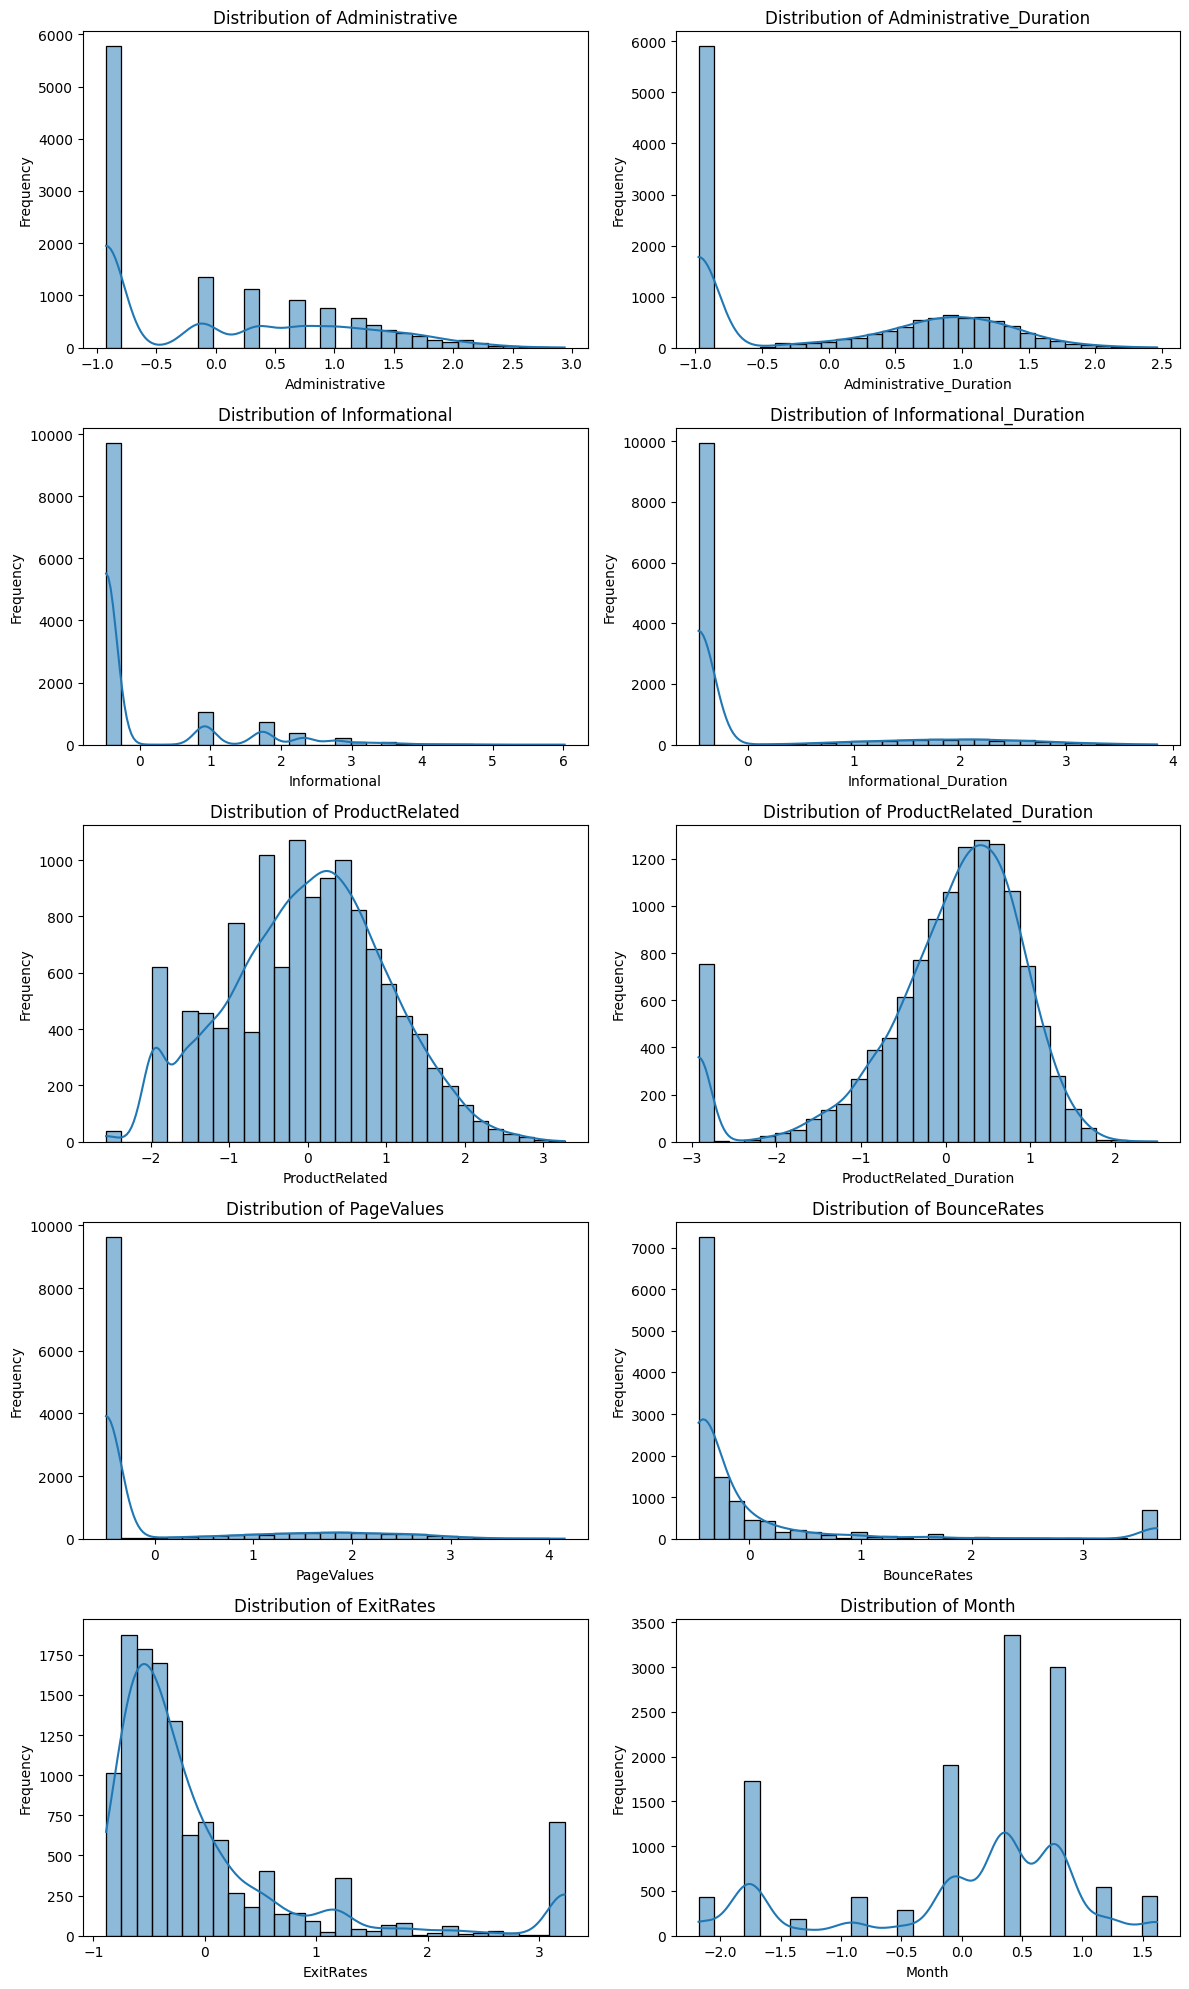

In [14]:
feature_engineering.set_strategy(StandardScaling(
    features=["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "PageValues", "BounceRates", "ExitRates", "Month"]))
test04 = feature_engineering.apply_feature_engineering(test03)

univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(test04, feature = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "PageValues", "BounceRates", "ExitRates", "Month"])

#### Notes
- Binary Encoding works well
- Log Encoding works very well for productrelated page and duration - others are still skewed but a little better than before